# Project 7 - Machine Learning  
Beth Spornitz - September 30th, 2024  
GitHub Repository Link - https://github.com/BethSpornitz/datafun-07-applied

## Import Dependencies

In [83]:
import matplotlib
import pandas as pd
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line

Create a lambda and use it to calculae Celsius equivalents of Fahrenheit temperatures.

In [84]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

Place the data in a dataframe using Pandas then use plot method to display the Fahrenheit and Celsius temperatures.

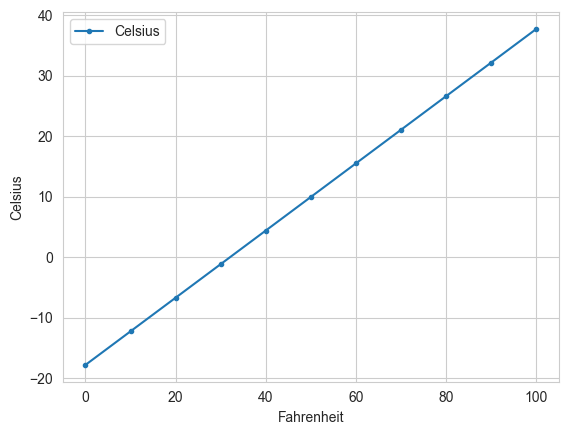

In [85]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## January Average High Temperatures 1895 - 2018

### Data Acquisition

Load the data into the datafame.

In [86]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

Inspect the head and tail.

In [87]:
nyc.head()
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Step 3 - Data Cleaning

Rename "Value" column as "Temperature".

In [88]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Check the column type.

In [89]:
nyc.Date.dtype

dtype('int64')

Divide by 100 to truncate the last two digits.

In [90]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Step 4 - Descriptive Statistics

Get basic descriptive statistics by calling describe on the Temperature column.

In [91]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

Use stats from scipy and use linregress to calculate a slop and intercept.

In [92]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)
linear_regression.slope


np.float64(0.014771361132966163)

Now the intercept

In [93]:
linear_regression.intercept

np.float64(8.694993233674289)

## Part 2 - Prediction

### Section 6 - Predict

Now predict the average January temperature in 2024.

In [94]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

Now we can predict the average temperature of 1890 (years before the file starts).

In [95]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

Plotting the average high temperatures and a regression line

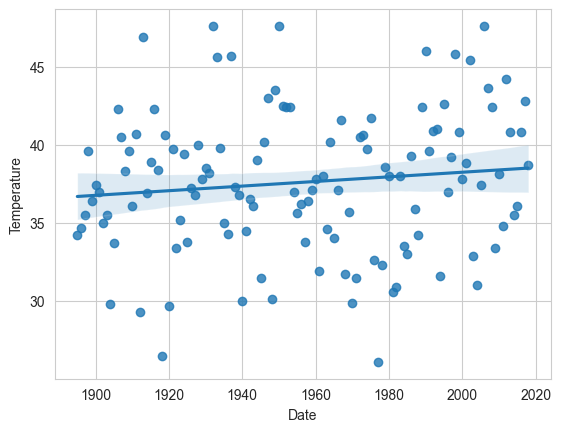

In [96]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

Scale the y axis for a better data visualizaion.

(10.0, 70.0)

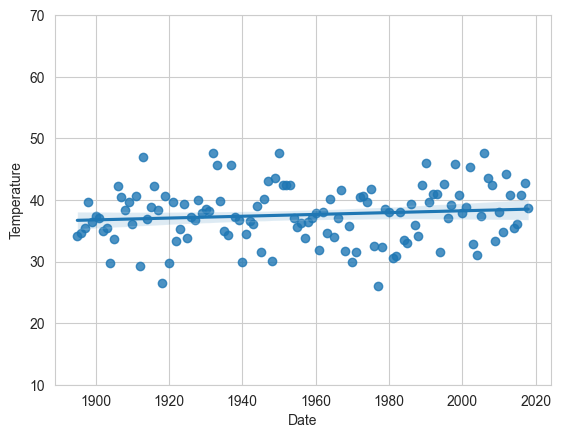

In [97]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Predict Avg High Temp in NYC in January 